In [265]:
import pandas as pd
from sqlalchemy import create_engine
import json
import matplotlib as plt
import seaborn as sns

In [266]:
dtypes = {
    'weight' : str,
    'height' : str,
}

conn = create_engine('sqlite:///newdb.db')
data = pd.read_sql('Player Values', conn, coerce_float=False ,columns=['id', 
                                                    'name', 
                                                    'pos',
                                                    'age', 
                                                    'weight',
                                                    'height',
                                                    'drafted',
                                                    'draftClass',
                                                    'exp', 
                                                    'valueData',
                                                    ])

In [267]:
def cleanJson(x):
    x = x.replace("'",'"')
    js = json.loads(x)
    return js

In [268]:
def toDataframe(x):
    df = pd.json_normalize(x).T
    return df

In [269]:
data['valueData'] = data['valueData'].apply(cleanJson)

ktcHeaders = pd.json_normalize(data.iloc[0]['valueData']).T.iloc[0]
ktcHeaders[-1:] = '2021-12-31'
ktcDf = pd.DataFrame(columns=ktcHeaders)

for i in range(0,len(data.valueData)):
    df = pd.json_normalize(data.valueData[i]).T.reset_index().drop('index',1)
    df.loc[0][-1:] = '2021-12-31'
    df.columns = df.iloc[0]
    df = df[1:]

    ktcDf = ktcDf.append(df)

ktcDf = ktcDf.reset_index().drop('index', 1).astype(float)


C:\Users\simer\AppData\Local\Temp/ipykernel_16060/2856557701.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = pd.json_normalize(data.valueData[i]).T.reset_index().drop('index',1)
C:\Users\simer\AppData\Local\Temp/ipykernel_16060/2856557701.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ktcDf = ktcDf.reset_index().drop('index', 1).astype(float)


In [270]:
df = data.join(ktcDf).drop('valueData',1)

C:\Users\simer\AppData\Local\Temp/ipykernel_16060/1005522674.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = data.join(ktcDf).drop('valueData',1)


In [310]:
#Masks
rookieMask = df.exp == 'Rookie'
nonPlayerMask = df.exp.isna()
draftPicksMask = df.pos == 'Rookie Draft Pick'
firstYearMask = df.exp == '1 yrs.'

In [311]:
nonFirstYearPlayers = df[-rookieMask]
draftPicks = df[draftPicksMask]
rookies = df[rookieMask]
firstYears = df[firstYearMask]

In [305]:
groupbyPosNonFirstYear=nonFirstYearPlayers.groupby('pos')
groupbyPosRookies=rookies.groupby('pos')

In [274]:
groupbyPosNonFirstYear['id'].count()

pos
Quarterback           41
Rookie Draft Pick     24
Running Back          89
Tight End             47
Wide Receiver        112
Name: id, dtype: int64

In [277]:
groupbyPosNonFirstYear['age'].mean().drop('Rookie Draft Pick')

pos
Quarterback      28.634146
Running Back     25.573034
Tight End        26.468085
Wide Receiver    26.044643
Name: age, dtype: float64

In [286]:
groupbyPosRookies['id'].count()

pos
Quarterback       9
Running Back     18
Tight End         9
Wide Receiver    21
Name: id, dtype: int64

In [288]:
def createLinePlot(data):
    sns.set(rc={'figure.figsize':(15,10)})
    plot = sns.lineplot(data=data)

    for ind, label in enumerate(plot.get_xticklabels()):
        if ind % 15 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)

    plot.tick_params(axis='x', rotation=60)

In [353]:
year = df.loc[:,'name':'exp']
year1d = df.loc[:,'2020-04-07': '2021-03-12']
year1 = year.join(year1d).drop(['age'],1).groupby('pos')

year2d = df.loc[:,'2021-03-12':'2021-12-31']
year2 = year.join(year2d).drop('age', 1).groupby('pos')

C:\Users\simer\AppData\Local\Temp/ipykernel_16060/2560210116.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  year1 = year.join(year1d).drop(['age'],1).groupby('pos')
C:\Users\simer\AppData\Local\Temp/ipykernel_16060/2560210116.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  year2 = year.join(year2d).drop('age', 1).groupby('pos')


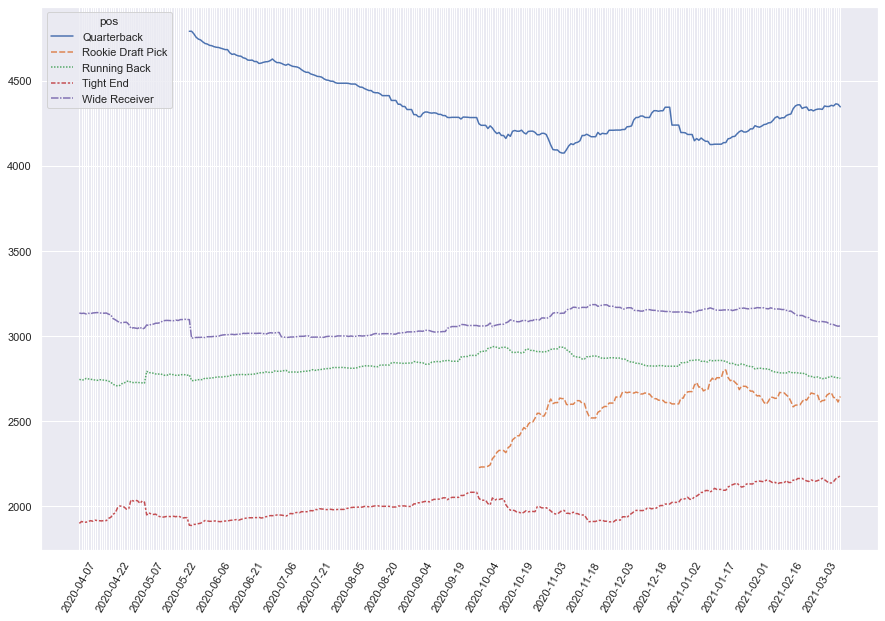

In [356]:
createLinePlot(year1.mean().T)

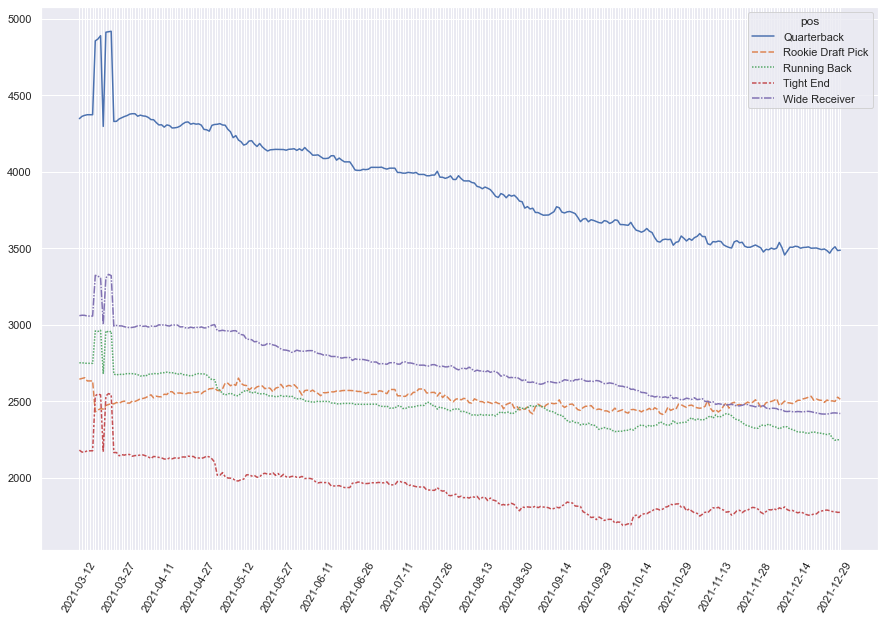

In [357]:
createLinePlot(year2.mean().T)

C:\Users\simer\AppData\Local\Temp/ipykernel_16060/3375340783.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  createLinePlot(d.mean().drop(['age'],1).T)


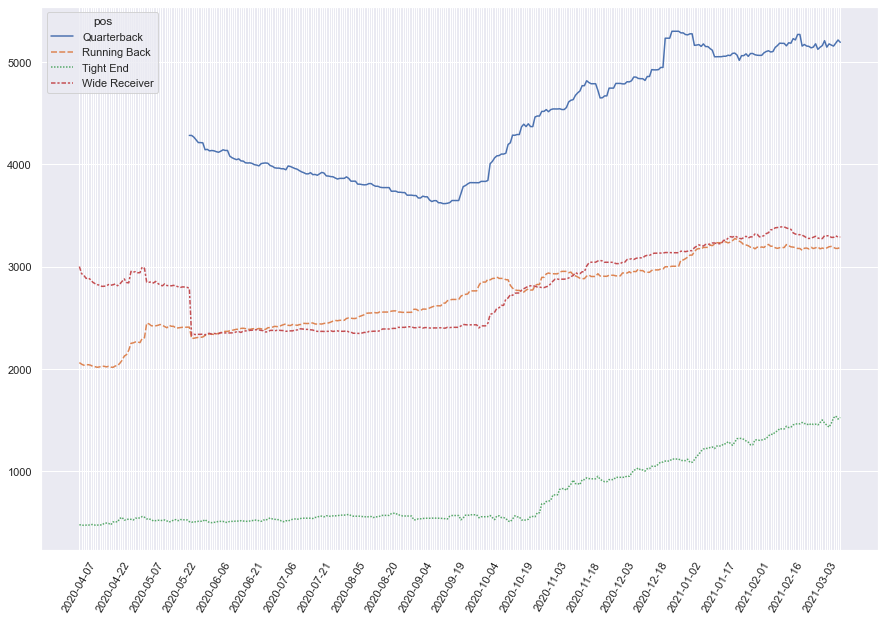

In [346]:
meas = firstYears.loc[:,'name':'exp']
tsData = firstYears.loc[:,'2020-04-07': '2021-03-12']
d = meas.join(tsData).groupby('pos')

createLinePlot(d.mean().drop(['age'],1).T)

C:\Users\simer\AppData\Local\Temp/ipykernel_16060/3408101430.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  createLinePlot(groupbyPosRookies.mean().drop(['id','age'],1).T)


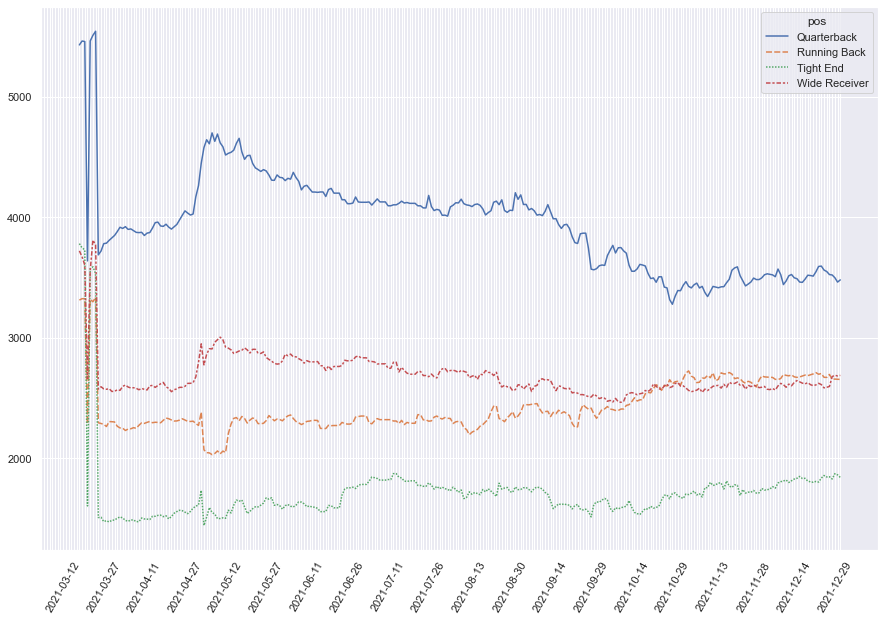

In [289]:
createLinePlot(groupbyPosRookies.mean().drop(['id','age'],1).T)

C:\Users\simer\AppData\Local\Temp/ipykernel_16060/3869618165.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  createLinePlot(groupbyPosNonFirstYear.mean().drop(['id','age'],1).T)


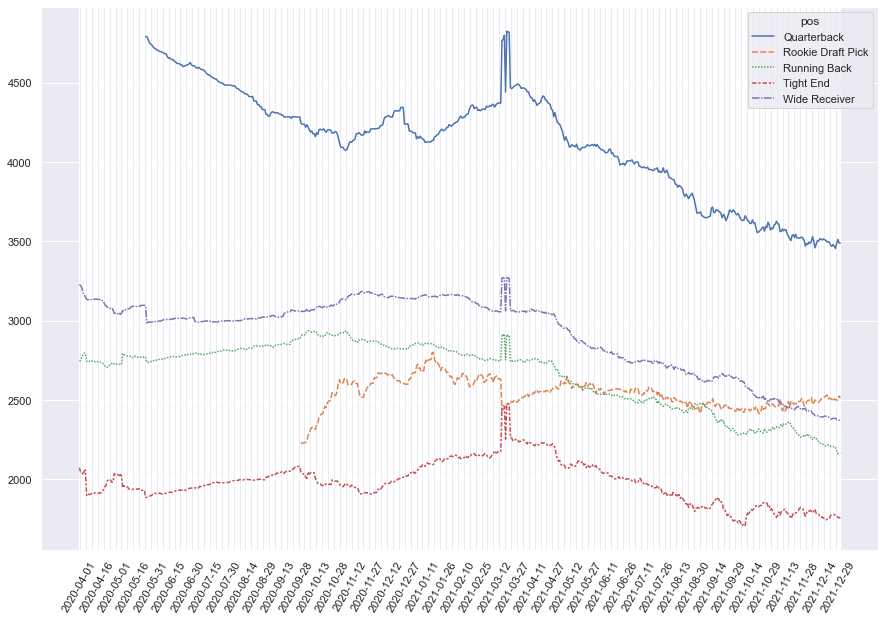

In [290]:
createLinePlot(groupbyPosNonFirstYear.mean().drop(['id','age'],1).T)